<a href="https://colab.research.google.com/github/sweta96/Malaria-Detection/blob/master/malaria(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

In [ ]:
!pip install -q kaggle

In [ ]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 98% 665M/675M [00:21<00:00, 42.5MB/s]
100% 675M/675M [00:21<00:00, 33.5MB/s]


In [ ]:
from zipfile import ZipFile
file_name = '/content/cell-images-for-detecting-malaria.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()

In [ ]:
!rm -r /content/cell_images/cell_images

In [ ]:
malaria='/content/cell_images'   #Folder path name
IMG_SIZE = 64,64

In [ ]:
image_names = []
data_labels = []
data_images = []

In [ ]:
import cv2
import os
import tensorflow as tf

def  create_data(DIR):
     for folder in os.listdir(DIR):
        for file in os.listdir(os.path.join(DIR,folder)):
            if file.endswith("png"):
                image_names.append(os.path.join(DIR,folder,file))
                data_labels.append(folder)
                img = cv2.imread(os.path.join(DIR,folder,file))
                im = cv2.resize(img,IMG_SIZE)
                data_images.append(im)
            else:
                continue

In [ ]:
create_data(malaria)

In [ ]:
import numpy as np

data = np.array(data_images)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

le = LabelEncoder()
label = le.fit_transform(data_labels)

Using TensorFlow backend.


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(data,label,test_size=0.20,random_state=42)

print("X_train shape",x_train.shape)
print("X_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

X_train shape (22046, 64, 64, 3)
X_test shape (5512, 64, 64, 3)
y_train shape (22046,)
y_test shape (5512,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  from ipykernel import kernelapp as app


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3936384   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
____________________________________________

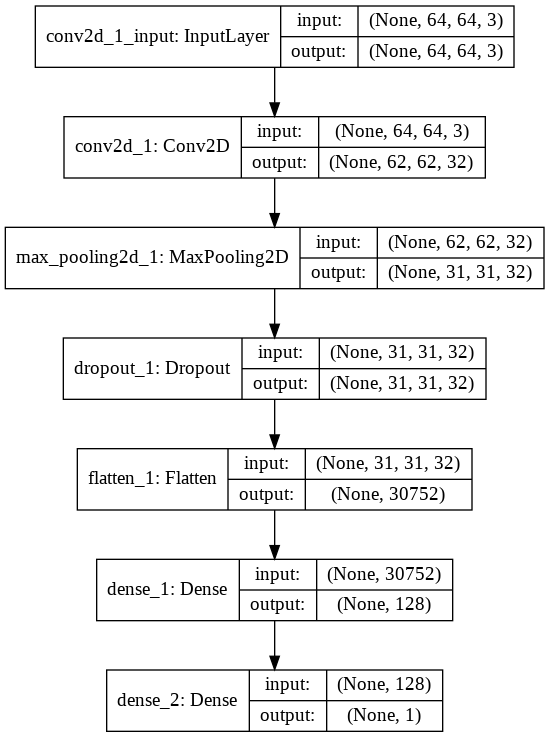

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model

classifier=Sequential()
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.5))
classifier.add(Flatten())
classifier.add(Dense(output_dim= 128, activation='relu'))
classifier.add(Dense(output_dim= 1, activation='sigmoid'))
classifier.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
classifier.summary()
plot_model(classifier, to_file='model_plot.png',show_shapes=True, show_layer_names=True)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_datagen.fit(x_train)

In [ ]:
history=classifier.fit_generator(
    train_datagen.flow(x_train,y_train, batch_size=64),
    steps_per_epoch =5000,
    epochs = 5,
    verbose = 1,
    validation_data = (x_test,y_test),
    validation_steps = 64)

Epoch 1/5
5000/5000 [==============================] - 442s 88ms/step - loss: 0.3319 - accuracy: 0.8398 - val_loss: 27.8936 - val_accuracy: 0.9178
Epoch 2/5
5000/5000 [==============================] - 436s 87ms/step - loss: 0.1711 - accuracy: 0.9414 - val_loss: 25.1341 - val_accuracy: 0.9307
Epoch 3/5
5000/5000 [==============================] - 436s 87ms/step - loss: 0.1430 - accuracy: 0.9515 - val_loss: 25.4826 - val_accuracy: 0.9399
Epoch 4/5
5000/5000 [==============================] - 435s 87ms/step - loss: 0.1294 - accuracy: 0.9553 - val_loss: 32.3595 - val_accuracy: 0.9458
Epoch 5/5
5000/5000 [==============================] - 437s 87ms/step - loss: 0.1181 - accuracy: 0.9588 - val_loss: 36.8891 - val_accuracy: 0.9472


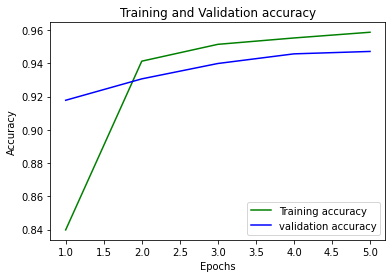

In [ ]:
import matplotlib.pyplot as plt

loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


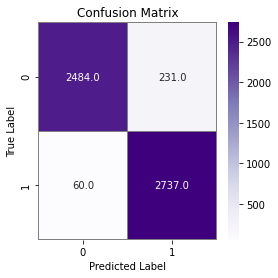

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred = classifier.predict_classes(x_test)
cm = confusion_matrix(y_test,pred)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
accuracy=(cm[0][0]+cm[1][1])/len(y_test)
print(accuracy)

0.9472060957910015
